<a href="https://colab.research.google.com/github/xdazxz/MNIST-Training/blob/master/MNISTTrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Training for MNIST Project**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
from torchvision import datasets, transforms
import torch.nn.functional as func
import random
from google.colab import drive
import torchvision.models

In [0]:
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
data_train = list(datasets.MNIST('data',train=True, download=True,transform=transforms.ToTensor()))[:40000]
data_val = list(datasets.MNIST('data',train=True, download=True,transform=transforms.ToTensor()))[40000:60000]
data_test = list(datasets.MNIST('data',train=False,download=True,transform=transforms.ToTensor()))
len(data_train),len(data_val), len(data_test)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


(40000, 20000, 10000)

**Model**

In [0]:
class DigitRecognizer(nn.Module):
  def __init__(self):
    super(DigitRecognizer, self).__init__()
    self.conv1 = nn.Conv2d(1, 5, 5)
    self.pool = nn.MaxPool2d(2)
    self.conv2 = nn.Conv2d(5, 10, 5)
    self.linear1 = nn.Linear(10*4*4, 10)
  def forward(self, x):
    x = self.pool(func.relu(self.conv1(x)))
    x = self.pool(func.relu(self.conv2(x)))
    x = x.view(-1, 10*4*4)
    x = func.softmax(self.linear1(x), dim=1)
    return x

**Accuracy**

In [0]:
def get_accuracy(model,dataset):
  correct = 0
  total = 0
  for images,labels in iter(dataset):
    output = model(images)
    pred = output.argmax(dim=1) #Every index corresponds to predicted label
    matching_matrix = pred == labels
    num_matching = matching_matrix.sum()
    correct += num_matching.item()
    total += images.shape[0] #Batch size
  return correct / total

**Training procedure**

In [0]:
def train(num_epochs, learning_rate, model, batch_size):

  criterion = nn.CrossEntropyLoss() #Use CrossEntropyLoss as loss function
  optim = torch.optim.SGD(model.parameters(), learning_rate) #Stochastic Gradient Descent for optimizer

  num_iter, losses, train_accuracy, val_accuracy, epochs = [], [], [], [], []
  n= 1
  for i in range(num_epochs): #Iterate through data num_epoch times
    for image, label in iter(train_loader): #Iterate through all the images in the batch
      #Step 1: Make a prediction
      pred = model(image)
      #Step 2: Calculate loss
      loss = criterion(pred, label) #See how well the model predicted the class
      #Step 3: Adjust weights/biases based on how the model did
      loss.backward()
      optim.step()
      optim.zero_grad()
      num_iter.append(n)
      n += 1
      losses.append(loss/batch_size)
    epochs.append(i+1)
    train_accuracy.append(get_accuracy(model,train_loader))
    val_accuracy.append(get_accuracy(model,val_loader))
  return (num_iter, train_accuracy, val_accuracy, losses, epochs)

**Testing**:
Full training set, 0.01 LR, 20 Epochs, 32 Batch

---



In [0]:
bound = 40000
batch = 32
train_loader = torch.utils.data.DataLoader(data_train[:bound], batch_size=batch, shuffle = True)
val_loader = torch.utils.data.DataLoader(data_val, batch_size=32, shuffle = True)
test_loader = torch.utils.data.DataLoader(data_test, batch_size=32, shuffle = True)

In [0]:
model = DigitRecognizer()
num_epochs = 20
learn_rate = 0.01
num_iter, train_accuracy, val_accuracy, losses, epochs = train(num_epochs, learn_rate, model,batch)

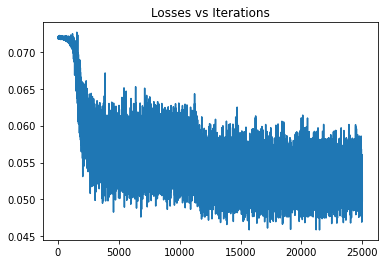

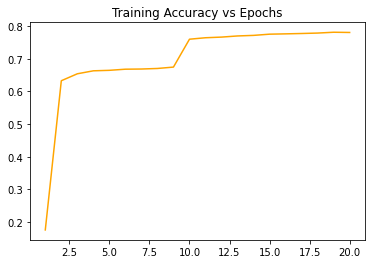

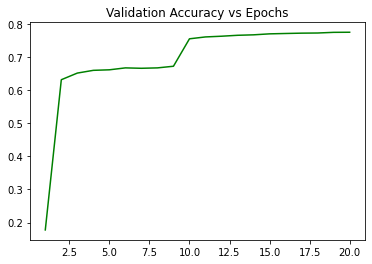

Final Validation Accuracy: 77.44% Final Training Accuracy: 78.08500000000001%


In [0]:
plt.plot(num_iter,losses)
plt.title("Losses vs Iterations")
plt.show()
plt.plot(epochs, train_accuracy,"orange")
plt.title("Training Accuracy vs Epochs")
plt.show()
plt.plot(epochs, val_accuracy,"green")
plt.title("Validation Accuracy vs Epochs")
plt.show()
print("Final Validation Accuracy: " + str(val_accuracy[-1]*100)+"%", "Final Training Accuracy: " + str(train_accuracy[-1]*100)+"%") #Final accuracy

**Testing**:
Full training set, 0.001 LR, 20 Epochs, 32 Batch

---



In [0]:
bound = 40000
batch = 32
train_loader = torch.utils.data.DataLoader(data_train[:bound], batch_size=batch, shuffle = True)
val_loader = torch.utils.data.DataLoader(data_val, batch_size=32, shuffle = True)
test_loader = torch.utils.data.DataLoader(data_test, batch_size=32, shuffle = True)

In [0]:
#model = DigitRecognizer()
num_epochs = 20
learn_rate = 0.001
num_iter, train_accuracy, val_accuracy, losses, epochs = train(num_epochs, learn_rate, model,batch)

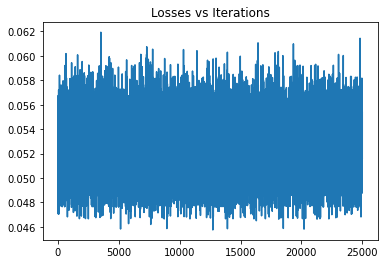

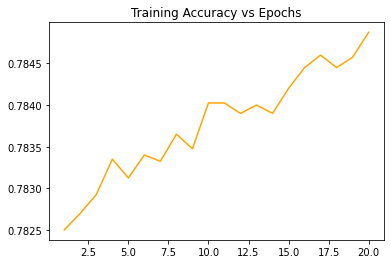

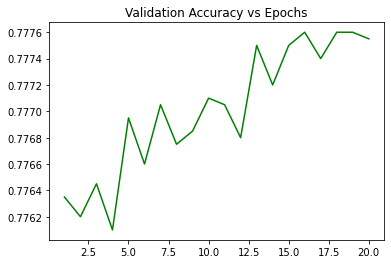

Final Validation Accuracy: 77.755% Final Training Accuracy: 78.4875%


In [0]:
plt.plot(num_iter,losses)
plt.title("Losses vs Iterations")
plt.show()
plt.plot(epochs, train_accuracy,"orange")
plt.title("Training Accuracy vs Epochs")
plt.show()
plt.plot(epochs, val_accuracy,"green")
plt.title("Validation Accuracy vs Epochs")
plt.show()
print("Final Validation Accuracy: " + str(val_accuracy[-1]*100)+"%", "Final Training Accuracy: " + str(train_accuracy[-1]*100)+"%") #Final accuracy

**Testing**:
Full training set, 0.02 LR, 20 Epochs, 32 Batch

---



In [0]:
bound = 40000
batch = 32
train_loader = torch.utils.data.DataLoader(data_train[:bound], batch_size=batch, shuffle = True)
val_loader = torch.utils.data.DataLoader(data_val, batch_size=32, shuffle = True)
test_loader = torch.utils.data.DataLoader(data_test, batch_size=32, shuffle = True)

In [0]:
#model = DigitRecognizer()
num_epochs = 20
learn_rate = 0.02
num_iter, train_accuracy, val_accuracy, losses, epochs = train(num_epochs, learn_rate, model,batch)

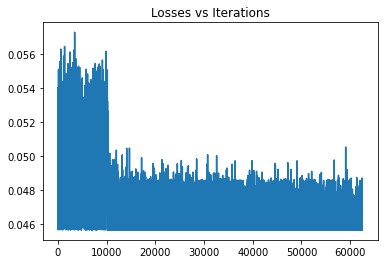

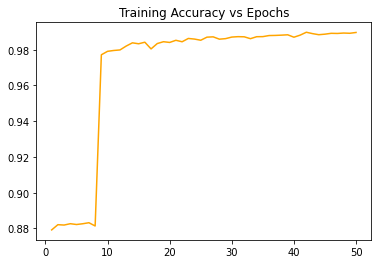

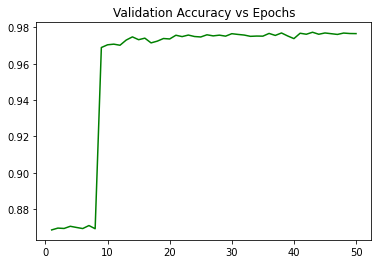

Final Validation Accuracy: 97.655% Final Training Accuracy: 98.965%


In [0]:
plt.plot(num_iter,losses)
plt.title("Losses vs Iterations")
plt.show()
plt.plot(epochs, train_accuracy,"orange")
plt.title("Training Accuracy vs Epochs")
plt.show()
plt.plot(epochs, val_accuracy,"green")
plt.title("Validation Accuracy vs Epochs")
plt.show()
print("Final Validation Accuracy: " + str(val_accuracy[-1]*100)+"%", "Final Training Accuracy: " + str(train_accuracy[-1]*100)+"%") #Final accuracy

**Final Testing**:
Full training set, 0.02 LR, 50 Epochs, 32 Batch

---



In [0]:
bound = 40000
batch = 32
train_loader = torch.utils.data.DataLoader(data_train[:bound], batch_size=batch, shuffle = True)
val_loader = torch.utils.data.DataLoader(data_val, batch_size=32, shuffle = True)
test_loader = torch.utils.data.DataLoader(data_test, batch_size=32, shuffle = True)

In [0]:
#model = DigitRecognizer()
num_epochs = 50
learn_rate = 0.02
num_iter, train_accuracy, val_accuracy, losses, epochs = train(num_epochs, learn_rate, model,batch)

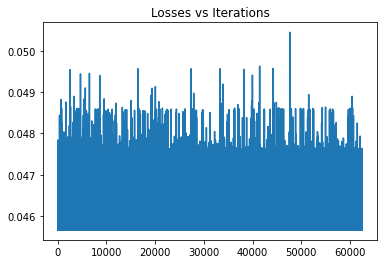

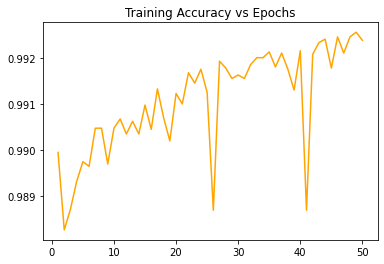

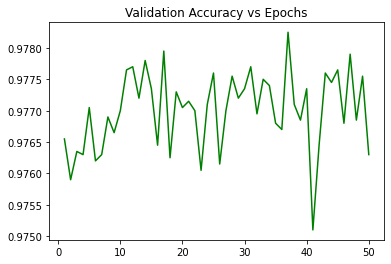

Final Validation Accuracy: 97.63% Final Training Accuracy: 99.2375%


In [0]:
plt.plot(num_iter,losses)
plt.title("Losses vs Iterations")
plt.show()
plt.plot(epochs, train_accuracy,"orange")
plt.title("Training Accuracy vs Epochs")
plt.show()
plt.plot(epochs, val_accuracy,"green")
plt.title("Validation Accuracy vs Epochs")
plt.show()
print("Final Validation Accuracy: " + str(val_accuracy[-1]*100)+"%", "Final Training Accuracy: " + str(train_accuracy[-1]*100)+"%") #Final accuracy

Save model parameters

In [0]:
torch.save(model.state_dict(),"/content/gdrive/My Drive/MNIST.pth")

Test Accuracy

In [0]:
get_accuracy(model,test_loader) #97.63%

0.9818

**Process Visualization**

In [0]:
image = data_train[0][0]
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()